<img src='http://www-scf.usc.edu/~ghasemig/images/sharif.png' alt="SUT logo" width=200 height=200 align=left class="saturate" >

<br>
<font face="Times New Roman">
<div dir=ltr align=center>
<font color=0F5298 size=7>
    Introduction to Machine Learning <br>
<font color=2565AE size=5>
    Computer Engineering Department <br>
    Fall 2022<br>
<font color=3C99D size=5>
    Homework 3: Practical - ML Models for Tabular Datasets <br>
<font color=696880 size=4>
    Niloufar Razani 
    
    
____

### Full Name : Bahar Oveis
### Student Number : 98106242
___

<font face="Times New Roman" size=4><div dir=ltr>
In this homework we are going to implement Adaboost algorithm from scratch. Please read this chapter's <a href="https://github.com/asharifiz/Introduction_to_Machine_Learning/tree/main/Jupyter_Notebooks/Chapter_04_Tabular_Data_Models"><font face="Roboto">notebook</font></a> and then complete the #TODO sections. <br>
We will use the heart_disease.csv dataset, which you can see more details about in this <a href="https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset?resource=download&select=heart.csv"><font face="Roboto">Link</font></a>.
___

In [76]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score


### Data Prepration (10 points) 
1.   Load Dataset
2.   Separate target feaure
3.   Change class labels to 1 and -1
4.   Do train-test split

#### Load Dataset , Explore

In [77]:
df = pd.read_csv('heart_disease.csv')

In [78]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [79]:
df.groupby("target").count().head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,499,499,499,499,499,499,499,499,499,499,499,499,499
1,526,526,526,526,526,526,526,526,526,526,526,526,526


#### Separate target feaure


In [80]:
print(df.shape)
y = df["target"].copy()
x = df.drop("target", axis=1)
print(x.shape)

(1025, 14)
(1025, 13)


#### Change class labels to 1 and -1


In [81]:
y[y==0] = -1

#### Do train-test split

In [82]:
from sklearn.model_selection import train_test_split
test_ratio = 0.3
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_ratio, random_state = 42)

### Adaboost Algorithm Implementation (40 points)

In [83]:
from sklearn.tree import DecisionTreeClassifier

def calculate_error(y, y_pred, w):
    res = sum(w * (y != y_pred))/sum(w)

    return res

def calculate_alpha(error):
    res = 0.5 * np.log((1-error)/error)
    return res


def update_weights(w, alpha, y, y_pred):

    incorrect_y = (y != y_pred)
    res = w * np.exp(alpha * incorrect_y)
    return res
    

    
class AdaBoost:
    def __init__(self):
        self.alphas = []
        self.G_M = []
        self.training_errors = []

    def fit(self, X, y, M = 100):
        
        self.alphas = [] 
        self.training_errors = []
        self.M = M
        self.y_preds = []
        w = np.ones(len(y))
        for m in range(0, M):
            #print("hh", m, " ",len(w)," ",w.shape,np.unique(w))
            # Set weights
            if m == 0:
                w = w / len(y)
            else:
                w = update_weights(w, alpha, y, y_pred)
            
            # 1. Fit weak classifier and predict labels(using predict method) and Save it to list of weak classifiers.
            G_m = DecisionTreeClassifier(max_depth=1)
            G_m.fit(X, y, sample_weight=w)
            y_pred = G_m.predict(X)
            self.y_preds.append(y_pred)
            self.G_M.append(G_m)
        

            # 2. Calculate error of this weak classifier and save it to list of trainingterrors.
            err = calculate_error(y, y_pred, w)
            self.training_errors.append(err)


            # 3. Calculate alpha of this weak classifier and save it to list of alphas.
            alpha = calculate_alpha(err)
            print("error", err)
            print("alpha", alpha)
            
            self.alphas.append(alpha)



    def predict(self, X):

        weak_preds = pd.DataFrame(index = range(len(X)), columns = range(self.M)) 
        for m in range(self.M):
            weak_preds.iloc[:,m] = self.G_M[m].predict(X) * self.alphas[m]
        y_pred = (1 * np.sign(weak_preds.T.sum())).astype(int)

        return y_pred

### Training and Evaluation (20 points)

In [84]:
ada=AdaBoost()
ada.fit(x_train, y_train,M = 300)

y_pred = ada.predict(x_test)
print('Precission:', round(precision_score(y_test, y_pred), 3)
    ,'Recall:', round(recall_score(y_test, y_pred), 3)
    ,'f-score:', round(f1_score(y_test, y_pred), 3)
    ,'Accurcy:', round(accuracy_score(y_test, y_pred), 3))




error 0.23849372384937695
alpha 0.58047770962111
error 0.25498128745592114
alpha 0.5361095878164767
error 0.26672699226220237
alpha 0.5056462253599402
error 0.29849885728786507
alpha 0.4272282119262523
error 0.3431897847478509
alpha 0.32455575431536016
error 0.37160663313827597
alpha 0.26266524686797754
error 0.3641111483945782
alpha 0.27878230634119666
error 0.4180773816235783
alpha 0.16533547094135553
error 0.3981535745585488
alpha 0.20658225447045933
error 0.37936942160499265
alpha 0.2461127827876028
error 0.3641022065206452
alpha 0.2788016164908181
error 0.4609088209401506
alpha 0.07834224096178619
error 0.41091826885491356
alpha 0.18008530054647517
error 0.44700657575550157
alpha 0.10638640251253886
error 0.3957447554923955
alpha 0.21161362615602541
error 0.41575388674335034
alpha 0.17011442704079507
error 0.3973836368450882
alpha 0.20818931342108543
error 0.4540299686837613
alpha 0.09220044017995307
error 0.43995395051857766
alpha 0.12067447402112874
error 0.4281851914273862
alph

In [85]:

from sklearn.ensemble import AdaBoostClassifier
ada_sl = AdaBoostClassifier(n_estimators = 300) 
ada_sl.fit(x_train, y_train)
y_pred_sl = ada_sl.predict(x_test)
print('Precission:', round(precision_score(y_test, y_pred_sl), 3)
    ,'Recall:', round(recall_score(y_test, y_pred_sl), 3)
    ,'f-score:', round(f1_score(y_test, y_pred_sl), 3)
    ,'Accurcy:', round(accuracy_score(y_test, y_pred_sl), 3))


Precission: 0.944 Recall: 0.899 f-score: 0.921 Accurcy: 0.925


### Early Stopping (15 points)

In [86]:

from sklearn.metrics import mean_squared_error
def calc_validation_err(n_estimators):
    clf = AdaBoostClassifier(n_estimators=n_estimators, random_state=0)
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    err = mean_squared_error(y_test, y_pred)
    result.append(err)
    print(err)
    return err
result=[] 
for i in range(1,800,50):
    calc_validation_err(i)


0.974025974025974
0.4935064935064935
0.44155844155844154
0.44155844155844154
0.38961038961038963
0.35064935064935066
0.2857142857142857
0.2727272727272727
0.2727272727272727
0.2727272727272727
0.22077922077922077
0.22077922077922077
0.15584415584415584
0.15584415584415584
0.15584415584415584
0.15584415584415584


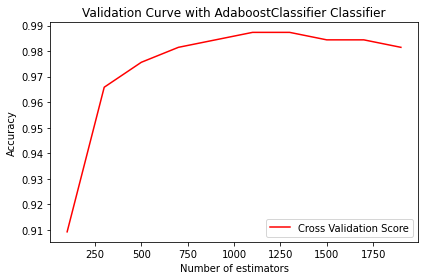

In [88]:
from sklearn.model_selection import validation_curve
train_score, test_score = validation_curve(AdaBoostClassifier(), x, y,
                                       param_name = "n_estimators",
                                       param_range = np.arange(100, 2000, 200),
                                        cv = 5, scoring = "accuracy")
mean_test_score = np.mean(test_score, axis = 1)
std_test_score = np.std(test_score, axis = 1)
plt.plot(np.arange(100, 2000, 200), mean_test_score,label = "Cross Validation Score", color = 'r')
# Creating the plot
plt.title("Validation Curve with AdaboostClassifier Classifier")
plt.xlabel("Number of estimators")
plt.ylabel("Accuracy")
plt.tight_layout()
plt.legend(loc = 'best')
plt.show()

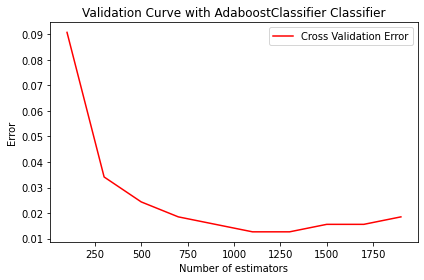

In [89]:
plt.plot(np.arange(100, 2000, 200), 1 - mean_test_score,label = "Cross Validation Error", color = 'r')
# Creating the plot
plt.title("Validation Curve with AdaboostClassifier Classifier")
plt.xlabel("Number of estimators")
plt.ylabel("Error")
plt.tight_layout()
plt.legend(loc = 'best')
plt.show()

In [91]:

print(np.min(1 - mean_test_score))
print(np.arange(100, 2000, 200)[np.argmin(100 - mean_test_score)])

0.012682926829268304
1100


error 0.23849372384937695
alpha 0.58047770962111
error 0.25498128745592114
alpha 0.5361095878164767
error 0.26672699226220237
alpha 0.5056462253599402
error 0.29849885728786507
alpha 0.4272282119262523
error 0.3431897847478509
alpha 0.32455575431536016
error 0.37160663313827597
alpha 0.26266524686797754
error 0.3641111483945782
alpha 0.27878230634119666
error 0.4180773816235783
alpha 0.16533547094135553
error 0.3981535745585488
alpha 0.20658225447045933
error 0.37936942160499265
alpha 0.2461127827876028
error 0.3641022065206452
alpha 0.2788016164908181
error 0.4609088209401506
alpha 0.07834224096178619
error 0.41091826885491356
alpha 0.18008530054647517
error 0.44700657575550157
alpha 0.10638640251253886
error 0.3957447554923955
alpha 0.21161362615602541
error 0.41575388674335034
alpha 0.17011442704079507
error 0.3973836368450882
alpha 0.20818931342108543
error 0.4540299686837613
alpha 0.09220044017995307
error 0.43995395051857766
alpha 0.12067447402112874
error 0.4281851914273862
alph

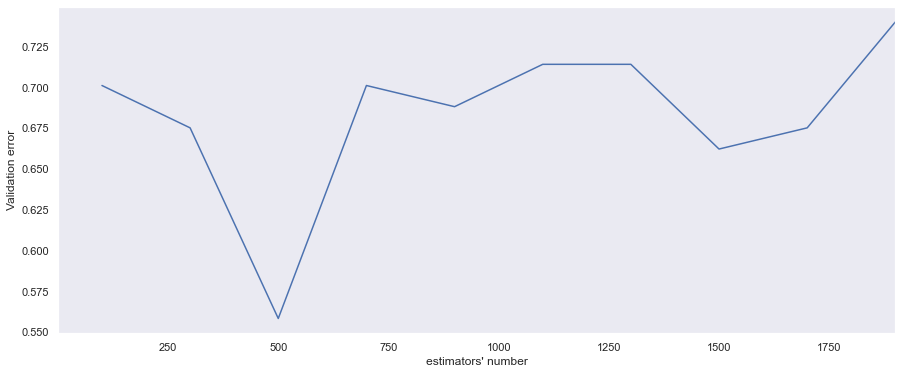

In [92]:
from sklearn.metrics import mean_squared_error

result={}
ada = AdaBoost()
for count_of_estimators in np.arange(100, 2000, 200):
  ada.fit(x_train, y_train, M=count_of_estimators)
  y_pred = ada.predict(x_test)
  val_error = mean_squared_error(y_test, y_pred)
  result[count_of_estimators]=val_error

plt.figure(figsize=(15, 6))
sns.set(style='dark',)
ax = sns.lineplot(x=list(result.keys()), y=list(result.values()))
plt.xlabel("estimators' number")
plt.ylabel("Validation error")
ax.set_xlim([1, max(list(result.keys()))])
plt.show()

In [93]:
print("The best number for estimators is: "+ str(list(result.keys())[list(result.values()).index(min(list(result.values())))]))
print("The minimum value for validation error is: "+ str(min(list(result.values()))))

The best number for estimators is: 500
The minimum value for validation error is: 0.5584415584415584


### Weighted Error (10 points)

error 0.23849372384937695
alpha 0.58047770962111
error 0.25498128745592114
alpha 0.5361095878164767
error 0.26672699226220237
alpha 0.5056462253599402
error 0.29849885728786507
alpha 0.4272282119262523
error 0.3431897847478509
alpha 0.32455575431536016
error 0.37160663313827597
alpha 0.26266524686797754
error 0.3641111483945782
alpha 0.27878230634119666
error 0.4180773816235783
alpha 0.16533547094135553
error 0.3981535745585488
alpha 0.20658225447045933
error 0.37936942160499265
alpha 0.2461127827876028
error 0.3641022065206452
alpha 0.2788016164908181
error 0.4609088209401506
alpha 0.07834224096178619
error 0.41091826885491356
alpha 0.18008530054647517
error 0.44700657575550157
alpha 0.10638640251253886
error 0.3957447554923955
alpha 0.21161362615602541
error 0.41575388674335034
alpha 0.17011442704079507
error 0.3973836368450882
alpha 0.20818931342108543
error 0.4540299686837613
alpha 0.09220044017995307
error 0.43995395051857766
alpha 0.12067447402112874
error 0.4281851914273862
alph

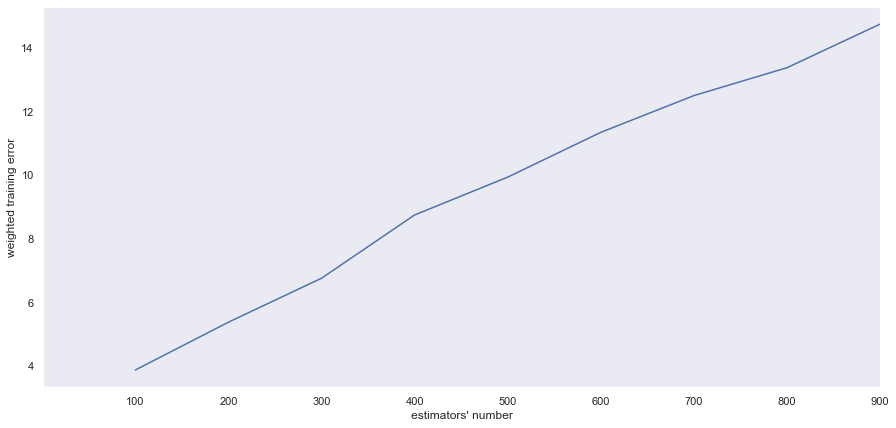

In [94]:
from sklearn.metrics import mean_squared_error

result={}
ada = AdaBoost()
for c in np.arange(100, 1000, 100):
  w = ada.fit(x_train, y_train, M=c)
  y_pred = ada.predict(x_test)
  result[c]=np.sum(np.asarray(ada.training_errors) * np.asarray(ada.alphas))

plt.figure(figsize=(15, 7))
sns.set(style='dark',)
ax = sns.lineplot(x=list(result.keys()), y=list(result.values()))
plt.xlabel("estimators' number")
plt.ylabel("weighted training error")
ax.set_xlim([1, max(list(result.keys()))])
plt.show()

6### Question : Why does the weighted error tend to increase as the number of estimators increase? (5points)